<a href="https://colab.research.google.com/github/jalammar/ecco/blob/main/notebooks/Ecco_Evolution_of_Selected_Token.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ecco
import warnings
warnings.filterwarnings('ignore')

In [4]:
import ecco
lm = ecco.from_pretrained('distilgpt2')

In [46]:
text= "The four Provinces in Ireland are; Ulster, Munster,"

output = lm.generate(text, generate=10, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

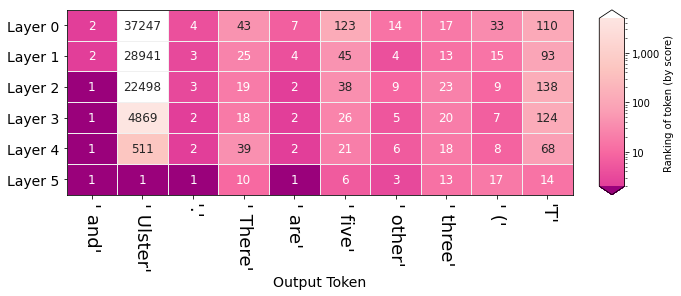

In [47]:
output.rankings()

In [48]:
output.saliency()

<IPython.core.display.Javascript object>

In [49]:
tokenized = lm.tokenizer(text, return_tensors="pt")
tokenized

{'input_ids': tensor([[  464,  1440,  1041,  7114,   728,   287,  7517,   389,    26, 50026,
            11, 12107,  1706,    11]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [33]:
lm.tokenizer.get_vocab()['The']

464

In [45]:
input_ids = output['input_ids'][0]
lm.tokenizer.batch_decode(input_ids)

['The',
 ' 4',
 ' Pro',
 'vin',
 'ces',
 ' in',
 ' Ireland',
 ' are',
 ';',
 ' M',
 'nd',
 'th',
 'aj',
 'd',
 'xd',
 ',',
 ' Ulster',
 ',',
 ' Mun',
 'ster',
 ',']

In [94]:
input_ids.shape

torch.Size([21])

In [42]:
lm.model.transformer

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0): Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (c_fc): Conv1D

In [50]:
lm.model.transformer(input_ids)

RuntimeError: Input, output and indices must be on the current device

In [57]:
import torch


In [61]:
device = "cuda:0"
model = lm.model.transformer
mode = model.to(device)

In [62]:
input_ids.to(device)

tensor([  464,   604,  1041,  7114,   728,   287,  7517,   389,    26,   337,
          358,   400,  1228,    67, 24954,    11, 50026,    11, 12107,  1706,
           11], device='cuda:0')

In [63]:
lm.model.transformer(input_ids)

RuntimeError: Input, output and indices must be on the current device

In [65]:
def _one_hot(token_ids, vocab_size):
    return torch.zeros(len(token_ids), vocab_size).scatter_(1, token_ids.unsqueeze(1), 1.)

embedding_matrix = lm.model_embeddings

vocab_size = embedding_matrix.shape[0]
one_hot_tensor = lm.to(_one_hot(input_ids, vocab_size))
one_hot_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [67]:
one_hot_tensor[1]

tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0')

In [93]:
one_hot_tensor.shape

torch.Size([21, 50257])

In [69]:
token_ids_tensor_one_hot = one_hot_tensor.clone().requires_grad_(True)
        # token_ids_tensor_one_hot.requires_grad_(True)

inputs_embeds = torch.matmul(token_ids_tensor_one_hot, embedding_matrix)
inputs_embeds, token_ids_tensor_one_hot

(tensor([[-0.0626, -0.0449,  0.0559,  ...,  0.0781, -0.0297, -0.0243],
         [-0.1686, -0.0275,  0.0320,  ..., -0.0621,  0.2120,  0.1868],
         [-0.0270, -0.0099,  0.2377,  ..., -0.0518,  0.1315, -0.0012],
         ...,
         [ 0.0203, -0.0914,  0.2287,  ...,  0.2563,  0.0751,  0.0450],
         [ 0.0719, -0.1795,  0.1472,  ..., -0.0917,  0.0388,  0.0854],
         [ 0.0086, -0.0009,  0.0056,  ...,  0.0484, -0.0737, -0.0636]],
        device='cuda:0', grad_fn=<MmBackward>),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', requires_grad=True))

In [75]:
token_ids_tensor_one_hot[0][463],token_ids_tensor_one_hot[0][464],token_ids_tensor_one_hot[0][465]

(tensor(0., device='cuda:0', grad_fn=<SelectBackward>),
 tensor(1., device='cuda:0', grad_fn=<SelectBackward>),
 tensor(0., device='cuda:0', grad_fn=<SelectBackward>))

In [92]:
inputs_embeds.shape

torch.Size([21, 768])

In [79]:
result = lm.model.transformer(inputs_embeds = inputs_embeds,return_dict=True, use_cache=False )

In [80]:
type(result)

transformers.modeling_outputs.BaseModelOutputWithPastAndCrossAttentions

In [83]:
result.keys()

odict_keys(['last_hidden_state', 'hidden_states'])

In [84]:
result.hidden_states

(tensor([[[-0.0815, -0.2423,  0.0599,  ...,  0.0350, -0.0015,  0.0302],
          [-0.1447, -0.0813, -0.0628,  ..., -0.0279,  0.2221,  0.1866],
          [-0.0228, -0.0947,  0.2922,  ..., -0.0321,  0.1508, -0.0226],
          ...,
          [ 0.0210, -0.0627,  0.3042,  ...,  0.2526,  0.0726,  0.0423],
          [ 0.0652, -0.1475,  0.2299,  ..., -0.0959,  0.0340,  0.0843],
          [ 0.0084,  0.0259,  0.0756,  ...,  0.0482, -0.0773, -0.0648]]],
        device='cuda:0', grad_fn=<AddBackward0>),
 tensor([[[-1.8613e-01, -8.6017e-01,  1.0876e+00,  ..., -2.5868e+00,
           -1.0287e-02, -5.2870e-01],
          [ 2.0093e+00, -2.0152e-01,  1.1645e+00,  ..., -1.0006e+00,
            5.5839e-01, -6.7677e-01],
          [ 5.0977e+00, -1.7863e+00, -5.8685e-01,  ..., -1.4364e+00,
           -8.3528e-01, -1.7980e+00],
          ...,
          [ 7.6839e+00, -2.9927e-01, -1.3368e+00,  ..., -3.7637e-01,
           -7.7816e-01, -3.7674e-01],
          [ 3.0583e-02, -4.2647e-03,  5.4010e-02,  ...,  6

In [85]:
lmresult = lm.model(inputs_embeds = inputs_embeds,return_dict=True, use_cache=False )
lmresult

CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[-31.6921, -29.4775, -31.2145,  ..., -42.1520, -42.1397, -31.2937],
        [-42.9858, -40.1557, -44.6920,  ..., -50.1688, -50.0359, -42.3772],
        [-51.4205, -50.8926, -54.7623,  ..., -58.6062, -59.6251, -50.8977],
        ...,
        [-70.8204, -67.8289, -72.5279,  ..., -81.0127, -79.7652, -68.8450],
        [-14.0877, -13.9825, -15.3471,  ..., -25.0423, -23.4864, -10.7735],
        [-77.1462, -76.3484, -77.6311,  ..., -84.6266, -82.7487, -72.7337]],
       device='cuda:0', grad_fn=<MmBackward>), past_key_values=None, hidden_states=(tensor([[[-0.0815, -0.2423,  0.0599,  ...,  0.0350, -0.0015,  0.0302],
         [-0.1447, -0.0813, -0.0628,  ..., -0.0279,  0.2221,  0.1866],
         [-0.0228, -0.0947,  0.2922,  ..., -0.0321,  0.1508, -0.0226],
         ...,
         [ 0.0210, -0.0627,  0.3042,  ...,  0.2526,  0.0726,  0.0423],
         [ 0.0652, -0.1475,  0.2299,  ..., -0.0959,  0.0340,  0.0843],
         [ 0.0084,  0.025

In [87]:
lmresult.keys()

odict_keys(['logits', 'hidden_states'])

In [91]:
lmresult.logits.shape, lmresult.logits

(torch.Size([21, 50257]),
 tensor([[-31.6921, -29.4775, -31.2145,  ..., -42.1520, -42.1397, -31.2937],
         [-42.9858, -40.1557, -44.6920,  ..., -50.1688, -50.0359, -42.3772],
         [-51.4205, -50.8926, -54.7623,  ..., -58.6062, -59.6251, -50.8977],
         ...,
         [-70.8204, -67.8289, -72.5279,  ..., -81.0127, -79.7652, -68.8450],
         [-14.0877, -13.9825, -15.3471,  ..., -25.0423, -23.4864, -10.7735],
         [-77.1462, -76.3484, -77.6311,  ..., -84.6266, -82.7487, -72.7337]],
        device='cuda:0', grad_fn=<MmBackward>))